In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import string
import nltk
nltk.download()
import re
from nltk import PorterStemmer
from nltk.tokenize import word_tokenize

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [2]:
np.warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('all_reviews_films4.csv')
data=data.drop('Unnamed: 0',axis=1)
data.sample(7)

,Title,Year,Review,TMeter,TMeter1
10965,The Deep,2013,"Think of it as The Grey () without the wolves,...",0.96,1.0
12478,The Situation,2006,Having served my duty by pointing out the main...,0.35,0.0
1621,Big Boys Gone Bananas!*,2012,The s protests of censorship ring hollow given...,0.76,1.0
6254,Lamb,2015,"Far removed from the prettified, exotic look o...",0.88,1.0
3377,Drag Me to Hell,2009,Theres something fundamentally disappointing a...,0.92,1.0
5362,Igor,2008,Decent animated horror spoof that plays better...,0.37,0.0
2221,Carancho,2011,In spite of a commendably nasty noir mentality...,0.87,1.0


In [4]:
data.shape

(14328, 5)

__Example of review before processing:__

In [6]:
review = data['Review'].loc[230]
review

'The kind of  that makes you wish theyd just do away with the Oscars altogether,  is as tasteful as a dentists office, and about as exciting Humanistic and engaging piece of popular entertainment As strong a performance as Russell Crowe has ever delivered A brilliant performance by Russell Crowe, who takes his audience on a terrifying journey inside a man tormented by self created mental demons, propels  The second, idealised, sentimentalised half of the  is torture, as we plod through the routine Im here to help psychiatrist, the walls plastered with cut up newspapers and the what happens when he stops taking the medicine stuff In a good cast, Jennifer Connelly earns your complete admiration Harrowing, heartbreaking and deeply human A beautiful  At its most effective when it seems to lose the plot in a scrambled second act that posits the Cold War as a collective paranoid delusion, the  reverts to type (and to fact) for a sentimental anti climax All the pieces are there and Ron Howard

__Defining the function for review processing:__

In [7]:
stemmer=PorterStemmer()
def preprocess_review(review):

    rev_lower = review.lower()

    words = nltk.word_tokenize(rev_lower)

    words_no_punc = [w for w in words if not w in string.punctuation]

    words_no_stopwords = [

        w 

        for w in words_no_punc

        if not w in nltk.corpus.stopwords.words('english')

    ]
    
    return ' '.join([stemmer.stem(w) for w in words_no_stopwords])

preprocess_review(review)

"kind make wish theyd away oscar altogeth tast dentist offic excit humanist engag piec popular entertain strong perform russel crow ever deliv brilliant perform russel crow take audienc terrifi journey insid man torment self creat mental demon propel second idealis sentimentalis half tortur plod routin im help psychiatrist wall plaster cut newspap happen stop take medicin stuff good cast jennif connelli earn complet admir harrow heartbreak deepli human beauti effect seem lose plot scrambl second act posit cold war collect paranoid delus revert type fact sentiment anti climax piec ron howard fit togeth play perfect game go‐ efilmcrit excel interest surpris twist‐ comingsoon tthe overween desir taken serious get way stori crow interpret tortur geniu textur complex differ might made wider sampl nash experi wouldnt necessarili better certainli wouldnt reveal glimps dark stori beneath sunni imageri perform carri enough weight stand someth pretti good tear jerker cant deni solidli craft well

__Processing the whole column with the process_review function in three loops:__

In [16]:
for i in range(5000):
    review=data['Review'].loc[i]
    data['Review'].loc[i]=preprocess_review(review)

In [17]:
for i in range(5000,10000):
    review=data['Review'].loc[i]
    data['Review'].loc[i]=preprocess_review(review)

In [18]:
for i in range(10000,14328):
    review=data['Review'].loc[i]
    data['Review'].loc[i]=preprocess_review(review)

In [21]:
data['Review'].loc[13210]

'interest distinct undevelop featur debut kind road mysteri overal narr lack focu though music number stretch nine minut provid cathart slightli clunki conclus compel dignifi perform visual impair musician barakat jabbour lead perform careworn convinc never less compel barren yet tranquil countrysid conceal bloodsh ravag boulghourjian care omit polit religion much possibl your expert lebanon contempl educ though without first flaw echt lebanes drama intriguingli delv innumer layer deceit will amnesia origin civil war continu straightjacket nation psych'

In [22]:
data.to_csv('data_for_prediction.csv')

__Rating prediction (Fresh(1) or Rotten(0)) with text analysis models:__

In [3]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import  metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV,StratifiedKFold
from sklearn.preprocessing import StandardScaler, Normalizer, MaxAbsScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score,classification_report

In [4]:
data1=pd.read_csv('data_for_prediction.csv')
data1=data1.drop('Unnamed: 0',axis=1)
data1.shape

(14328, 5)

In [4]:
data1.sample(5)

,Title,Year,Review,TMeter,TMeter1
13680,Wah Do Dem,2010,slacker road myth polit packag engagingli chil...,0.72,1.0
7274,Mission: Impossible III,2006,excit begin end best franchis ‐ filmsinreview ...,0.70,1.0
6406,Leprechaun: Origins,2014,isnt bad downright insult lipovski noth seri b...,0.00,0.0
4087,For Your Consideration,2006,thing disappoint watch one favorit comedian st...,0.51,0.0
1175,Aurora,2011,puiu talent transform highli disturb portrait ...,0.75,1.0


In [5]:
X=data1.Review
y=data1.TMeter1

In [6]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=3000, random_state=123)

__Fitting different models and comparing the scores:__

In [7]:
pipe=Pipeline([("vectorizer", TfidfVectorizer()),
               ("bayes", MultinomialNB())])
               
param_grid={"vectorizer__max_features":[3500,4000,4500],
            "vectorizer__ngram_range":[(1,1),(1,2)],
            "bayes__alpha":[0.3,0.5,1]
            }
gs=GridSearchCV(pipe, param_grid, cv=5,scoring='accuracy', n_jobs=6)
gs.fit(X_train, y_train)


print(f"GS best params: {gs.best_params_}")
print(f"GS best accuracy on train set: {gs.score(X_train,y_train)}")
print(f"Accuracy on test set: {gs.score(X_test,y_test)}")


GS best params: {'bayes__alpha': 0.3, 'vectorizer__max_features': 4500, 'vectorizer__ngram_range': (1, 1)}
GS best accuracy on train set: 0.8259180790960452
Accuracy on test set: 0.8033333333333333


In [8]:
pipe=Pipeline([("vectorizer", TfidfVectorizer()),
               ("tree", DecisionTreeClassifier())])
               
param_grid={"vectorizer__max_features":[3500,4000],
            "vectorizer__ngram_range":[(1,1),(1,2)],
            "tree__min_samples_split":[50,100,200],
            "tree__min_samples_leaf":[300,600,900],
            "tree__max_features":[500,1000,2000]
            }
gs=GridSearchCV(pipe, param_grid,scoring='accuracy',cv=5, n_jobs=6)
gs.fit(X_train, y_train)


print(f"GS best params: {gs.best_params_}")
print(f"GS best accuracy on train set: {gs.score(X_train,y_train)}")
print(f"Accuracy on test set: {gs.score(X_test,y_test)}")

GS best params: {'tree__max_features': 2000, 'tree__min_samples_leaf': 300, 'tree__min_samples_split': 100, 'vectorizer__max_features': 3500, 'vectorizer__ngram_range': (1, 2)}
GS best accuracy on train set: 0.7222810734463276
Accuracy on test set: 0.71


In [9]:
pipe = Pipeline([("vectorizer", TfidfVectorizer()),
                 ("scaler", Normalizer()),
                 ('svm',SVC())])

param_grid = [{"vectorizer__max_features":[3500,4000]},
              {"vectorizer__ngram_range":[(1,1),(1,2)]},
              {'svm__kernel':['rbf'],
               'svm__gamma':[0.5],
               'svm__C':[0.5]},

              {'svm__kernel':['poly'],
               'svm__degree':[1,2],
               'svm__C':[0.5]},

              {'svm__kernel':['sigmoid'],
               'svm__C':[0.5]}]

gs = GridSearchCV(pipe, param_grid, scoring='accuracy',cv=5, n_jobs=6)
gs.fit(X_train,y_train)

    
print(f"GS best params: {gs.best_params_}")
print(f"GS best accuracy on train set: {gs.score(X_train,y_train)}")
print(f"Accuracy on test set: {gs.score(X_test,y_test)}")

GS best params: {'svm__C': 0.5, 'svm__gamma': 0.5, 'svm__kernel': 'rbf'}
GS best accuracy on train set: 0.9226694915254238
Accuracy on test set: 0.847


In [7]:
pipe=Pipeline([("vectorizer", TfidfVectorizer()),
               ("bagg", BaggingClassifier())])
               
param_grid={"vectorizer__max_features":[4000,4500],
            "vectorizer__ngram_range":[(1,1),(1,2)],
            "bagg__n_estimators":[40,50,60]
            }
gs=GridSearchCV(pipe, param_grid,scoring='accuracy', cv=5, n_jobs=6)
gs.fit(X_train, y_train)


print(f"GS best params: {gs.best_params_}")
print(f"GS best accuracy on train set: {gs.score(X_train,y_train)}")
print(f"Accuracy on test set: {gs.score(X_test,y_test)}")

GS best params: {'bagg__n_estimators': 60, 'vectorizer__max_features': 4500, 'vectorizer__ngram_range': (1, 1)}
GS best accuracy on train set: 1.0
Accuracy on test set: 0.796


In [7]:
pipe=Pipeline([("vectorizer", TfidfVectorizer()),
               ("forest", RandomForestClassifier())])
               
param_grid={"vectorizer__max_features":[3800,4000,4200],
            "vectorizer__ngram_range":[(1,1),(1,2)],
            "forest__n_estimators":[200,300,400],
            "forest__max_depth":[350,500,650]}

gs=GridSearchCV(pipe, param_grid,scoring='accuracy', cv=5, n_jobs=6)
gs.fit(X_train,y_train)

print(f"GS best params: {gs.best_params_}")
print(f"GS best accuracy on train set: {gs.score(X_train,y_train)}")
print(f"Accuracy on test set: {gs.score(X_test,y_test)}")

GS best params: {'forest__max_depth': 650, 'forest__n_estimators': 400, 'vectorizer__max_features': 4000, 'vectorizer__ngram_range': (1, 2)}
GS best accuracy on train set: 1.0
Accuracy on test set: 0.8266666666666667


In [13]:
pipe=Pipeline([("vectorizer", TfidfVectorizer()),
               ("scaler", Normalizer()),
               ("sgd", SGDClassifier())])
               
param_grid={"vectorizer__max_features":[3500,4000,4500],
            "vectorizer__ngram_range":[(1,1),(1,2)],
            "sgd__penalty":["l1","l2","elasticnet"], 
            "sgd__alpha":[0.00001,0.0001,0.001]}
gs=GridSearchCV(pipe, param_grid,scoring='accuracy',cv=5, n_jobs=6)
gs.fit(X_train, y_train)


print(f"GS best params: {gs.best_params_}")
print(f"GS best accuracy on train set: {gs.score(X_train,y_train)}")
print(f"Accuracy on test set: {gs.score(X_test,y_test)}")

GS best params: {'sgd__alpha': 0.0001, 'sgd__penalty': 'elasticnet', 'vectorizer__max_features': 4000, 'vectorizer__ngram_range': (1, 2)}
GS best accuracy on train set: 0.9221398305084746
Accuracy on test set: 0.8616666666666667


__The best results were achieved using LogisticRegression:__

In [14]:
pipe=Pipeline([("vectorizer", TfidfVectorizer()),
               ("scaler", Normalizer()),
               ("logreg", LogisticRegression())])
               
param_grid={"vectorizer__max_features":[3500,4000,4500],
            "vectorizer__ngram_range":[(1,1),(1,2)],
            "logreg__penalty":["l1","l2"], 
            "logreg__C":[0.1,1,10]}
gs=GridSearchCV(pipe, param_grid, scoring='accuracy',cv=5, n_jobs=-1)
gs.fit(X_train, y_train)


print(f"GS best params: {gs.best_params_}")
print(f"GS best accuracy on train set: {gs.score(X_train,y_train)}")
print(f"Accuracy on test set: {gs.score(X_test,y_test)}")

GS best params: {'logreg__C': 1, 'logreg__penalty': 'l2', 'vectorizer__max_features': 4000, 'vectorizer__ngram_range': (1, 2)}
GS best accuracy on train set: 0.9055437853107344
Accuracy on test set: 0.862


In [15]:
best_model=gs.best_estimator_
precision_score(y_pred=best_model.predict(X_test),y_true=y_test)

0.8657684630738522

In [16]:
print(classification_report(y_pred=best_model.predict(X_test),y_true=y_test))

              precision    recall  f1-score   support

         0.0       0.85      0.76      0.80      1120
         1.0       0.87      0.92      0.89      1880

   micro avg       0.86      0.86      0.86      3000
   macro avg       0.86      0.84      0.85      3000
weighted avg       0.86      0.86      0.86      3000



In [17]:
y_pred=best_model.predict(X_test)
confmat=confusion_matrix(y_true=y_test,y_pred=y_pred)


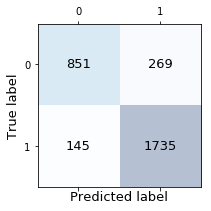

In [18]:
fig,ax=plt.subplots(figsize=(3,3))
ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,s=confmat[i,j],va='center',ha='center',fontsize=13)
plt.xlabel('Predicted label',fontsize=13)
plt.ylabel('True label',fontsize=13)
plt.show()